## 목표
- 버섯의 특징을 활용해 독/식용 버섯을 분류
- DecisionTree 시각화 & 과대적합 속성 제어

In [1]:
# 1. 데이터를 로딩
# 2. 전체 컬럼, 행 숫자 파악
# 3. 결측치 파악
# 4. 문제와 답 분리
# 5. 기술통계 -> 범주형 데이터 : 갯수, 최빈값, 종류
# 6. label의 비율을 확인해보자

In [2]:
# mushroom.csv 파일 가져오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('mushroom.csv')

In [5]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


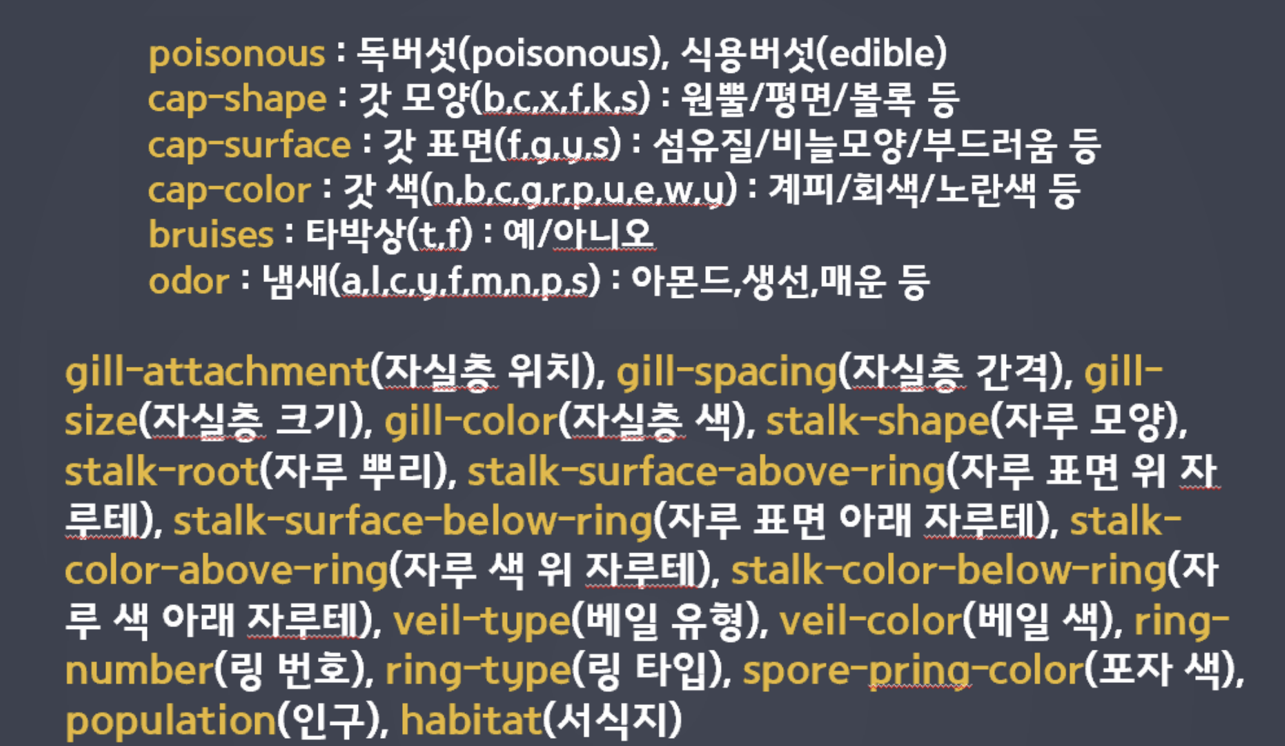

In [6]:
# data의 크기/모양 확인
data.shape

(8124, 23)

In [8]:
# data의 정보(결측치/행 개수..) 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
# 문제, 답 데이터 분리
X = data.loc[:,'cap-shape':]
y = data['poisonous']
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [10]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [11]:
# y(답)에서 p와 e의 개수 확인
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [12]:
# 범주형 데이터 기술 통계 확인
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 인코딩
- 원핫인코딩/레이블인코딩

### 레이블 인코딩
- 단순 수치 값으로 mapping하는 작업
- 숫자 값의 크고 작음에 대한 특성으로 인해 예측성능이 떨어지는 경우가 발생함

#### 레이블인코딩 방법1

In [13]:
# 'habitat' 데이터의 중복을 제거한 값 확인
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [14]:
# mapping : 데이터를 연결한다
habitat_dict = {
    'u' : 2,
    'g' : 1,
    'm' : 3,
    'd' : 5,
    'p' : 4,
    'w' : 6,
    'l' : 7
}
habitat_dict

{'u': 2, 'g': 1, 'm': 3, 'd': 5, 'p': 4, 'w': 6, 'l': 7}

In [15]:
X['habitat'].map(habitat_dict)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

#### 레이블인코딩방법2 : LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
items=X['habitat'].unique()

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit() : 레이블 인코더를 학습시킴
encoder.fit(items)

# transform() : 학습된 인코더를 사용하여 데이터를 변환
labels = encoder.transform(items)

print("인코딩 변환값 :",labels)

인코딩 변환값 : [5 1 3 0 4 6 2]


In [17]:
print("인코딩 클래스 :",encoder.classes_)

인코딩 클래스 : ['d' 'g' 'l' 'm' 'p' 'u' 'w']


## 원핫인코딩
- 특성을 세부적으로 나눠서 생각할 수 있음
- 단어를 표현하는 가장 기본적인 표현 방법
- 필요한 공간이 계속 늘어나 저장 공간 측면에서는 비료율적인 방법

In [18]:
# get_dummies() 메서드 활용
X_one_hot = pd.get_dummies(X) # 0과 1로만 이루어진 열을 생성
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [19]:
# 원핫인코딩 이전과 원핫인코딩 이후 특성 비교하기
print("원핫인코딩 이전 특성 : \n",list(X.columns),"\n")
print("원핫인코딩 이후 특성 : \n",list(X_one_hot.columns),"\n")

원핫인코딩 이전 특성 : 
 ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 

원핫인코딩 이후 특성 : 
 ['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-co

### 모델링

In [20]:
# 문제와 답데이터를 훈련셋과 테스트 셋으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,
                                                    y,
                                                    test_size=0.3,
                                                   random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier

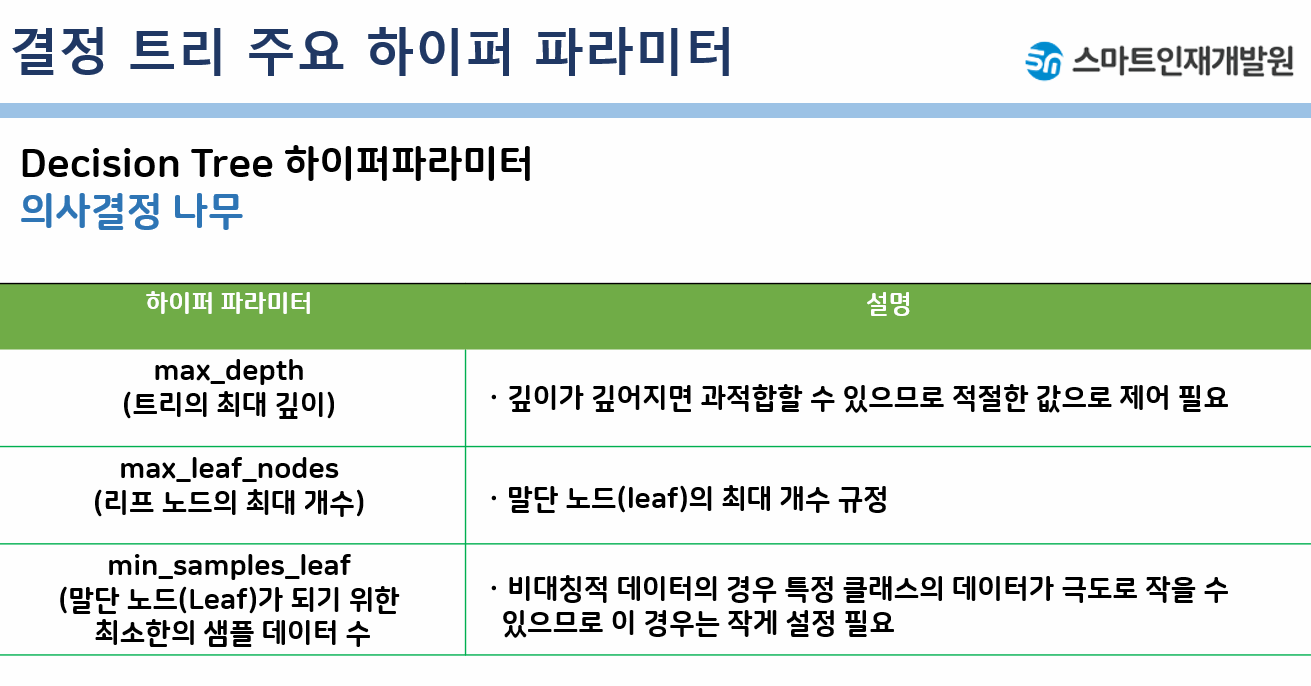

In [31]:
# 결정트리 모델 생성 - tree라는 변수에 담아주기
tree = DecisionTreeClassifier(max_depth=3)

In [32]:
#훈련 - fit()메서드 활용
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [33]:
pre = tree.predict(X_test)
pre

array(['p', 'e', 'e', ..., 'p', 'p', 'p'], dtype=object)

In [34]:
from sklearn import metrics
print("예측정확도 :",metrics.accuracy_score(pre,y_test))

예측정확도 : 0.9835931091058244


In [35]:
train_pre = tree.predict(X_train)
train_pre

array(['p', 'e', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [36]:
metrics.accuracy_score(train_pre,y_train)

0.9859303552585297

### 결정트리 시각화

In [37]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [38]:
plt.rcParams['font.family'] = 'Malgun Gothic'

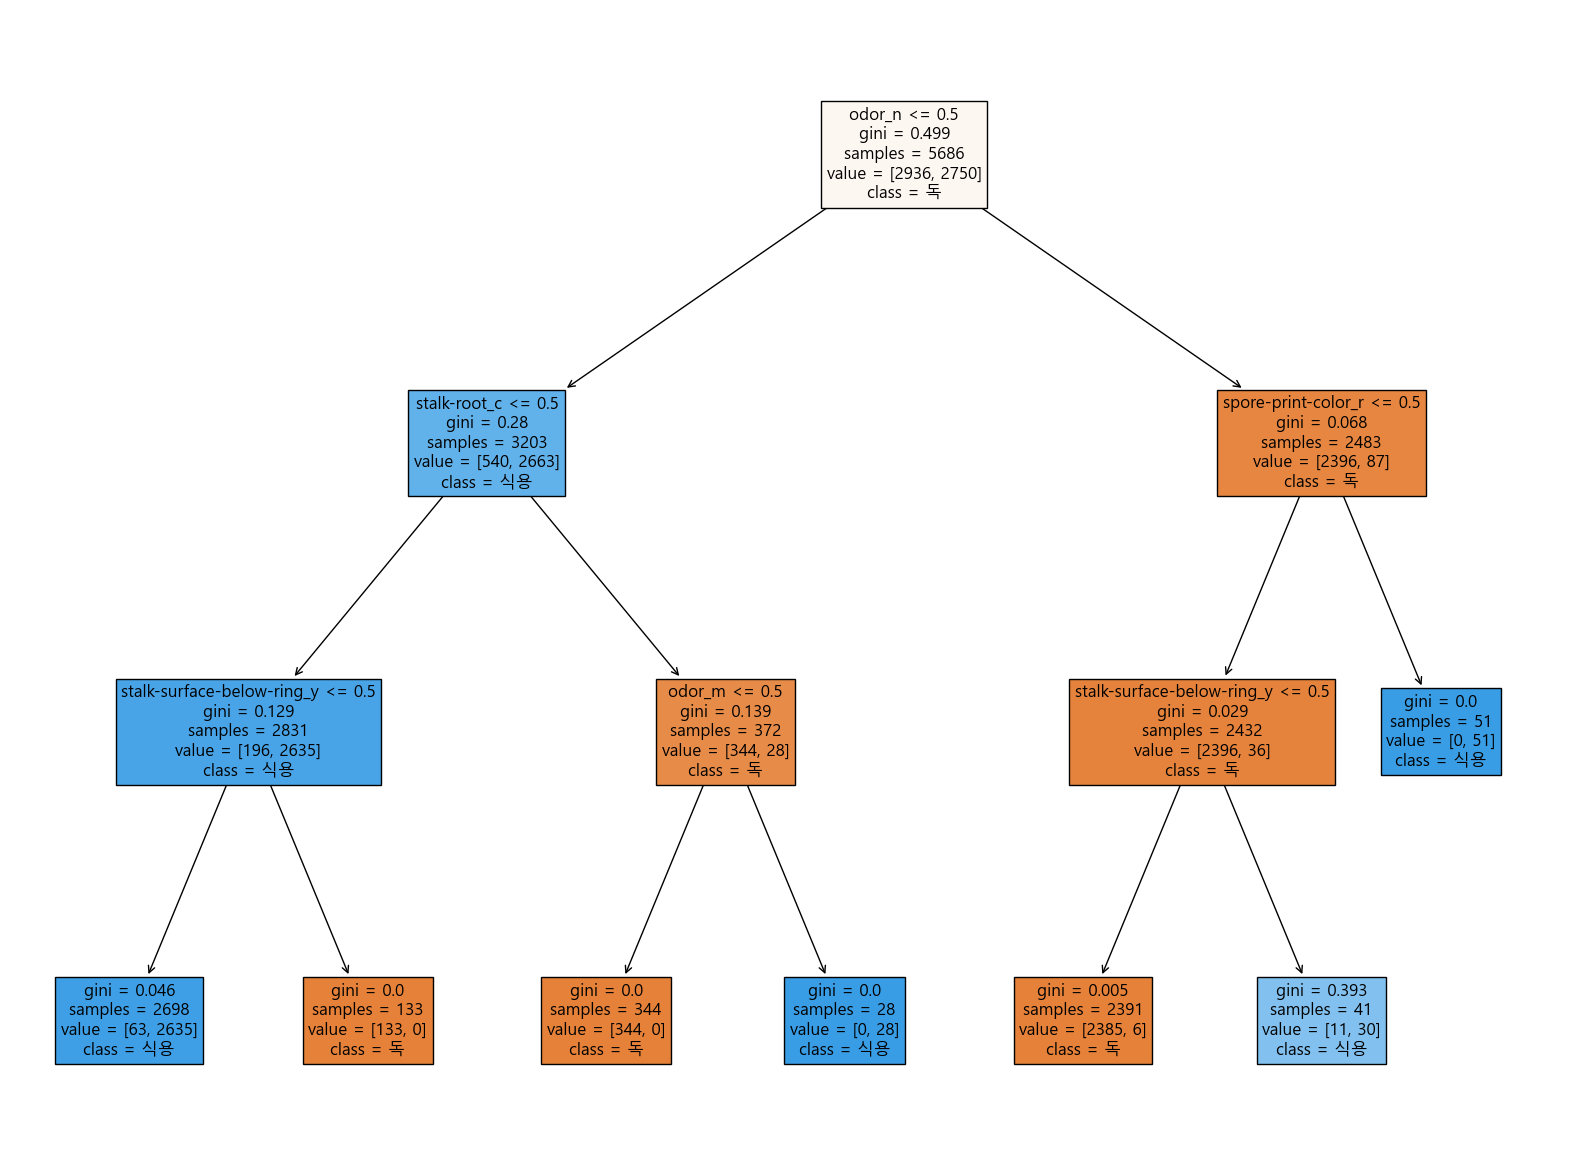

In [39]:
plt.figure(figsize=(20,15))
plot_tree(tree, filled=True, class_names=['독','식용'], feature_names=list(X_one_hot.columns), fontsize=12)
plt.show()

### 특성선택
- tree 모델의 특성중요도

In [40]:
fi = tree.feature_importances_
print("특성 중요도\n",fi)

특성 중요도
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01925927 0.65981564 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.17899043
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10587101 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

In [42]:
# 컬럼이름은 '특성중요도'로 설정
# 내림차순 정렬
importance_df = pd.DataFrame(fi, index = X_one_hot.columns, columns=['특성중요도'])
importance_df.sort_values('특성중요도',ascending=False).head()

# order_n이라는 특성이 가장 중요한 특성으로 나타남

,특성중요도
odor_n,0.659816
stalk-root_c,0.178990
stalk-surface-below-ring_y,0.105871
spore-print-color_r,0.036064
odor_m,0.019259


### 하이퍼파라미터 튜닝

In [45]:
test_list = []
train_list = []
for n in range(1,105,2):
    # 모델 생성
    tree = DecisionTreeClassifier(max_depth=n)
    # 모델 훈련
    tree.fit(X_train,y_train)
    # 테스트 성능 예측
    test_pre = tree.predict(X_test)
    # 테스트 성능 평가, 리스트에 담기
    test_list.append(metrics.accuracy_score(test_pre,y_test))    
    
    # 트레인 성능 예측
    train_pre = tree.predict(X_train)
     # 트레인 성능 평가, 리스트에 담기
    train_list.append(metrics.accuracy_score(train_pre,y_train))
    
print(test_list)
print(train_list)

[0.8798195242001641, 0.9835931091058244, 0.9995898277276456, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8897291593387266, 0.9859303552585297, 0.9996482588814632, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


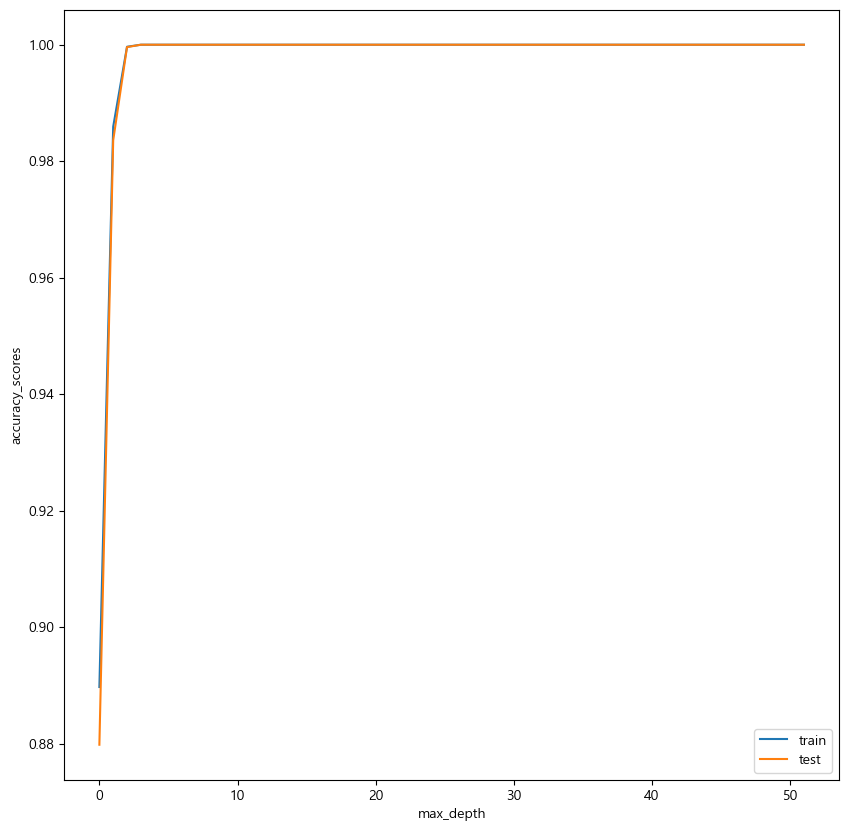

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(range(len(train_list)), train_list, label='train')
plt.plot(range(len(test_list)), test_list, label='test')

plt.xlabel('max_depth')
plt.ylabel('accuracy_scores', rotation=90)
plt.legend()
plt.show()

### K 폴드 교차 검증
- K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 세트에 학습과 검증 평가를 반복적으로 수행함

In [57]:
import numpy as np

In [131]:
from sklearn.model_selection import KFold
# 데이터프레임을 넘파이배열로 변환
feature = X_one_hot.to_numpy()
label = y.to_numpy()

# 5개의 폴드 세트로 분리하는 KFold 객체생성
kfold = KFold(n_splits=5)

In [186]:
# 세트별 정확도를 담을 리스트 생성
cv_accuracy = []
# KFold객체의 spit() 호출하면 세트별 학습용, 검증용 행 인덱스를 반환
for train_index, test_index in kfold.split(X_one_hot):
    # 학습용, 검즈용 데이터를 추출
    X_train, X_test = feature[train_index], feature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    tree.fit(X_train,y_train)
    pre = tree.predict(X_test)
    
    # 반복 마다 정확도 측정
    accuracy = metrics.accuracy_score(pre,y_test)
    
    cv_accuracy.append(accuracy)
    
print(cv_accuracy)

[1.0, 1.0, 1.0, 1.0, 0.9901477832512315]


In [211]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(tree,
                        X_train,
                        y_train,
                        cv =5 )
result

array([1.        , 1.        , 1.        , 0.99769231, 0.92538462])

In [212]:
result.mean()

0.9846153846153847